<a href="https://colab.research.google.com/github/nileshgarg12/SHALA2020-/blob/master/ML_L9_Assignment_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#loading customer data from csv file
csv = 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv'
customer_data = pd.read_csv(csv)

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
#we can drop customerid column as it is irrelevent
customer_data = customer_data.drop(['CustomerID'],axis=1)    


In [5]:
print("is data having any missing value :",customer_data.isnull().values.any())    #checking if data has any missing value
                              #and if no missing value then it will return false

is data having any missing value : False


In [0]:
#convert categorical variable to numerical 
customer_data['Male'] = pd.get_dummies(customer_data.Gender,drop_first=True)    
customer_data = customer_data.drop(['Gender'],axis=1)   

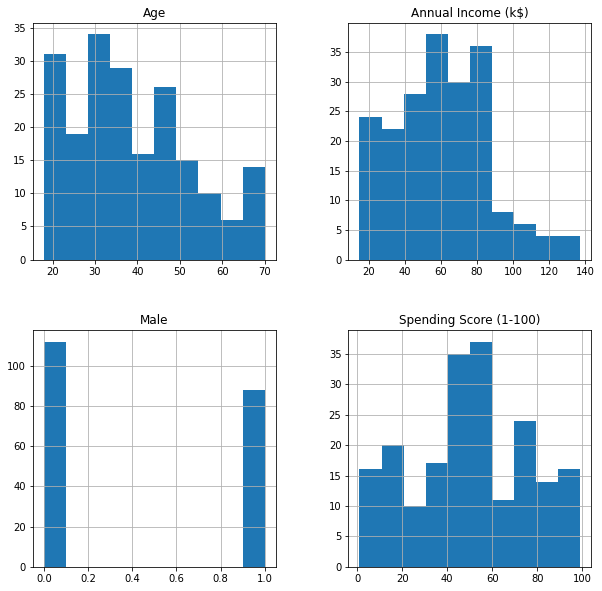

In [7]:
customer_data.hist(figsize=(10,10))    #plotting histogram
# as we can see data is somewhat guassian distributed
plt.show()

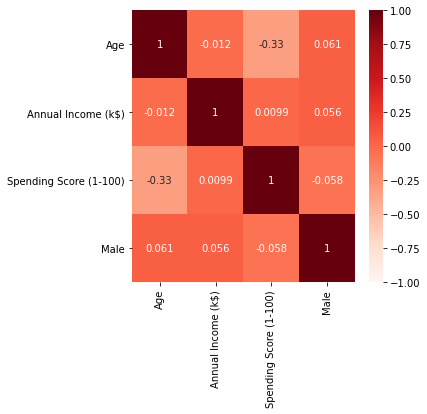

In [8]:
# Find out the correlation matrix 
customer_data.corr()

# Draw the heatmap 
plt.figure(figsize=(5,5))


sns.heatmap(customer_data.corr(),vmin=-1,annot=True,cmap=plt.cm.Reds)

#after analyzing the heatmap we can say data is not correlated

In [25]:
##normalizing our data using standardscaler
from sklearn import preprocessing
columns = customer_data.columns #columns of original dataset
#to_norm = customer_data.drop(['Male'],axis=1) #drooping male column beacuse it is not normalized 
std = preprocessing.StandardScaler()
customer_data_std = std.fit_transform(customer_data)
customer_data_std = pd.DataFrame(customer_data_std,columns=columns)

customer_data_std.head()    #normalized dataframe



,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


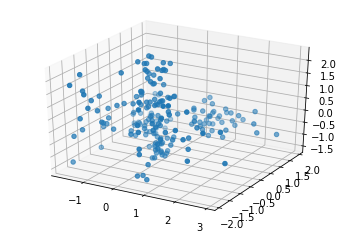

In [26]:
from mpl_toolkits.mplot3d import Axes3D

x = customer_data_std['Annual Income (k$)'];y=customer_data_std['Spending Score (1-100)'];z = customer_data_std['Age']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y,z,  marker='o')
plt.show()